In [ ]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2024-08-01 09:10:27--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M  44.8MB/s    in 1.5s    

2024-08-01 09:10:29 (44.8 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Assign training and validation set directories
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
  '''Creates a CNN with 4 convolutional layers'''
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])

  return model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

EPOCHS=20

# Create new model
model_for_aug = create_model()

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Train the new model
history_with_aug = model_for_aug.fit(
      train_generator,
      epochs=EPOCHS,
      validation_data=validation_generator,
      )

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.4686 - loss: 0.6969 - val_accuracy: 0.5000 - val_loss: 0.7456
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.5376 - loss: 0.6896 - val_accuracy: 0.6250 - val_loss: 0.6779
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.5683 - loss: 0.6842 - val_accuracy: 0.6120 - val_loss: 0.6630
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.5698 - loss: 0.6822 - val_accuracy: 0.6240 - val_loss: 0.6500
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.6153 - loss: 0.6495 - val_accuracy: 0.6480 - val_loss: 0.6352
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.6063 - loss: 0.6557 - val_accuracy: 0.6550 - val_loss: 0.6149
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.6189 - loss: 0.6401 - val_accuracy: 0.6940 - val_loss: 0.5987
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.6283 - loss: 0.6379 - val_accu

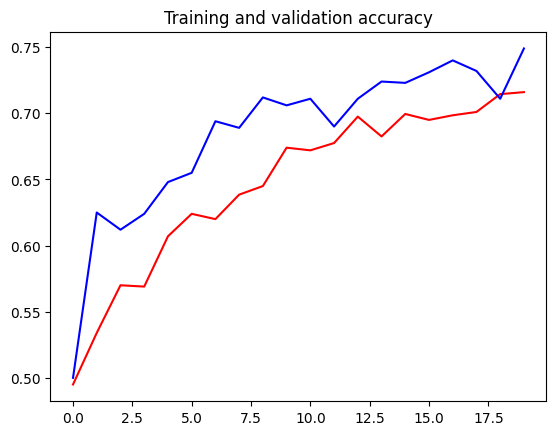

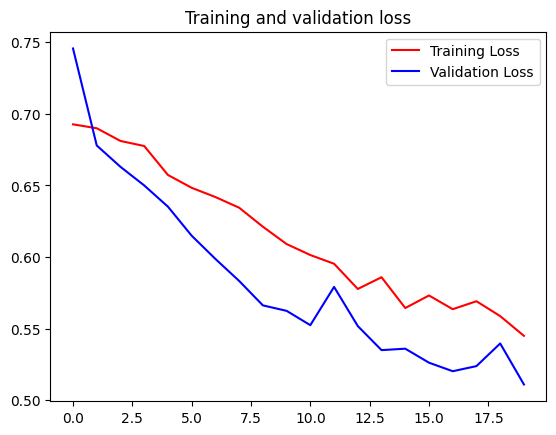

In [ ]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history_with_aug.history['accuracy']
val_acc = history_with_aug.history['val_accuracy']
loss = history_with_aug.history['loss']
val_loss = history_with_aug.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()